In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer

# Load the Iris dataset
dataset = load_iris()
X = dataset.data
feature_names = dataset.feature_names

# Access the target variable (data labels)
target = dataset.target
target_names = dataset.target_names

# Convert the data to a pandas DataFrame for better exploration
df = pd.DataFrame(X, columns=feature_names)

# Print the shape of the dataset
print("Dataset Shape:")
print(X.shape)

print(' ')

# Print the name of the target variable
print("target_names")
print(target_names)

print(' ')

# Print feature names
print("Feature Names")
print(feature_names)

Dataset Shape:
(150, 4)
 
target_names
['setosa' 'versicolor' 'virginica']
 
Feature Names
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Convert the data to a pandas Dataframe for better exploration
df = pd.DataFrame(X, columns=feature_names)

# Print the relavent informations about dataset
print("Dataset Info:")
print(dataset.DESCR)

print(' ')
print(" ")

Dataset Info:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===

In [6]:
# Print the first few rows ot the dataset
print("Dataset Preview:")
print(df.head())

print(' ')

# Print relevant information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
 
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [7]:
# Select features for the normalization comparison
selected_features = ['sepal length (cm)', 'petal width (cm)']

# Extract the selected features
selected_data = df[selected_features]

# Calculate statistics of the selected features
statistics = selected_data.describe()
print("Feature Statistics:")
print(statistics)

Feature Statistics:
       sepal length (cm)  petal width (cm)
count         150.000000        150.000000
mean            5.843333          1.199333
std             0.828066          0.762238
min             4.300000          0.100000
25%             5.100000          0.300000
50%             5.800000          1.300000
75%             6.400000          1.800000
max             7.900000          2.500000


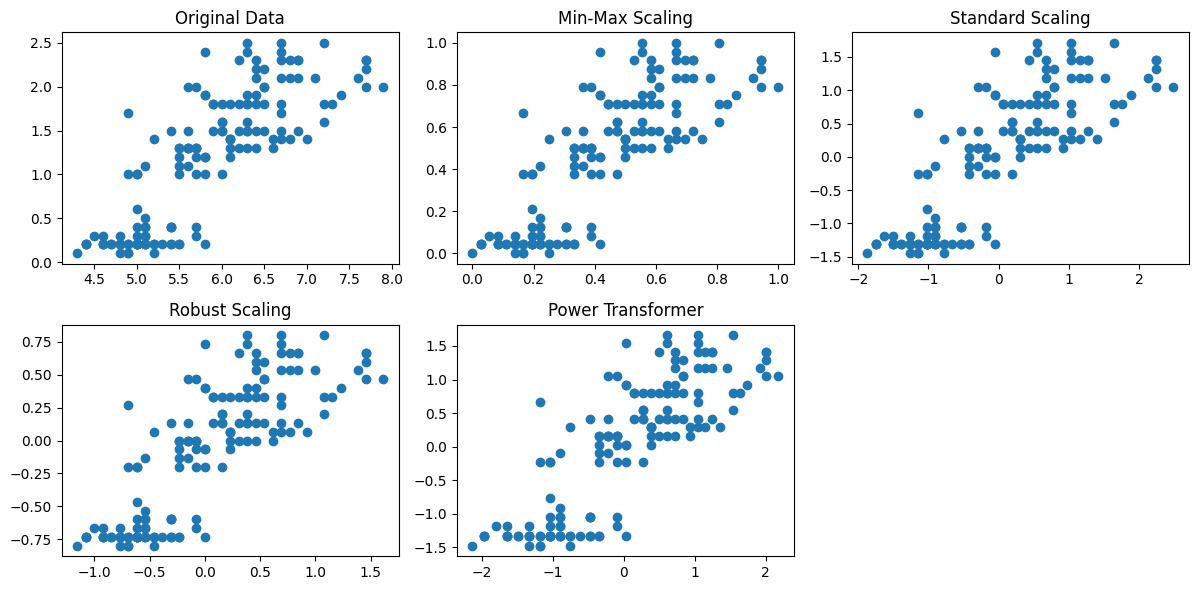

In [8]:
# Initialize normalization methods
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
power_transformer = PowerTransformer(method = 'yeo-johnson')


# Apply normalization methods
normalized_min_max = min_max_scaler.fit_transform(selected_data)
normalized_standard = standard_scaler.fit_transform(selected_data)
normalized_robust = robust_scaler.fit_transform(selected_data)
normalized_power = power_transformer.fit_transform(selected_data)


# Create scatter plots for original and normalized data
plt.figure(figsize = (12, 6))

plt.subplot(2, 3, 1)
plt.scatter(selected_data['sepal length (cm)'], selected_data['petal width (cm)'])
plt.title("Original Data")

plt.subplot(2, 3, 2)
plt.scatter(normalized_min_max[:,0], normalized_min_max[:,1])
plt.title("Min-Max Scaling")

plt.subplot(2, 3, 3)
plt.scatter(normalized_standard[:,0], normalized_standard[:,1])
plt.title("Standard Scaling")

plt.subplot(2, 3, 4)
plt.scatter(normalized_robust[:,0], normalized_robust[:,1])
plt.title("Robust Scaling")

plt.subplot(2, 3, 5)
plt.scatter(normalized_power[:,0], normalized_power[:,1])
plt.title("Power Transformer")

plt.tight_layout()
plt.show()

1. Min-Max Scaling: Scales the data to a specific range (usually [0, 1]). This method doesn't handle outliers well, as they can have a significant impact on the scaling.

2. Standard Scaling: Centers the data around mean 0 and standard deviation 1. This method assumes a normal distribution and is sensitive to outliers.

3. Robust Scaling: Scales the data using median and interquartile range (IQR), making it more robust to outliers.

4. Power Transformer: Applies a power transformation to make the data more Gaussian-like. It's also robust to outliers.

From the scatter plots, we'll likely observe how each method affects the spread of the data points. Robust Scaling and Power Transformer methods are generally more robust to outliers compared to Min-Max Scaling and Standard Scaling.